# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url and indicate imperial 
url ="http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

In [4]:
#Build a partial
query = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#Create extracts for temp, humidity, cloudiness, and wind speed
latitude =[]
longitude =[]
temperature =[]
humidity =[]
cloudiness =[]
wind_speed=[]
dates=[]

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                          })



Processing record 1 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=saint george
Processing record 2 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=mataura
Processing record 3 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=port lincoln
Processing record 4 | dedougou
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=dedougou
Processing record 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=butaritari
Processing record 6 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=rikitea
Processing record 7 | ossora
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imper

Processing record 58 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=hithadhoo
Processing record 59 | calabozo
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=calabozo
Processing record 60 | eidsvag
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=eidsvag
Processing record 61 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=aklavik
Processing record 62 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=constitucion
Processing record 63 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=saskylakh
Processing record 64 | daia
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial

Processing record 115 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=clyde river
Processing record 116 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=kemijarvi
Processing record 117 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=isangel
Processing record 118 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=naryan-mar
Processing record 119 | syava
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=syava
Processing record 120 | formoso do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=formoso do araguaia
Processing record 121 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3

Processing record 172 | braganca paulista
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=braganca paulista
Processing record 173 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=alofi
Processing record 174 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=khatanga
Processing record 175 | biu
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=biu
Processing record 176 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=ratnagiri
Processing record 177 | serowe
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=serowe
Processing record 178 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f140879282

Processing record 228 | halalo
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=halalo
Processing record 229 | kadnikov
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=kadnikov
Processing record 230 | iralaya
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=iralaya
Processing record 231 | rosario
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=rosario
Processing record 232 | miri
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=miri
Processing record 233 | nesher
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=nesher
Processing record 234 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=te anau
Process

Processing record 285 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=tiarei
Processing record 286 | floro
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=floro
Processing record 287 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=san quintin
Processing record 288 | euclides da cunha
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=euclides da cunha
Processing record 289 | arrecife
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=arrecife
Processing record 290 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=hovd
Processing record 291 | russell
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=

Processing record 342 | camargo
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=camargo
Processing record 343 | idah
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=idah
Processing record 344 | lichuan
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=lichuan
Processing record 345 | qandala
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=qandala
Processing record 346 | toliary
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=toliary
Processing record 347 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=cap malheureux
Processing record 348 | sobreira
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&

Processing record 399 | leiyang
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=leiyang
Processing record 400 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=mount gambier
Processing record 401 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=vaitupu
Processing record 402 | bogorodskoye
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=bogorodskoye
Processing record 403 | laurinburg
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=laurinburg
Processing record 404 | rakitnoye
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=rakitnoye
Processing record 405 | belmonte
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f140

Processing record 456 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=port augusta
Processing record 457 | santa maria del rio
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=santa maria del rio
Processing record 458 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=hasaki
Processing record 459 | nara
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=nara
Processing record 460 | bentiu
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=bentiu
Processing record 461 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=bubaque
Processing record 462 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f140879282

Processing record 512 | bati
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=bati
Processing record 513 | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=haibowan
Processing record 514 | kadirli
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=kadirli
Processing record 515 | segovia
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=segovia
Processing record 516 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=beringovskiy
Processing record 517 | jardim
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=jardim
Processing record 518 | grand island
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&

Processing record 569 | brokopondo
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=brokopondo
Processing record 570 | sakakah
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=sakakah
Processing record 571 | san francisco
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=san francisco
Processing record 572 | quirinopolis
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=quirinopolis
Processing record 573 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=havre-saint-pierre
Processing record 574 | yishui
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636fec442ff9e3f14087928218&units=imperial&q=yishui
Processing record 575 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=c594d1636

In [6]:
weather_df =weather_df.dropna(how='any')
print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 552 unique cities.


In [7]:
weather_df.head()

City  Latitude  Longitude  Humidity  Max Temp  Cloudiness  \
0  saint george   37.1041  -113.5841      36.0     77.47           8   
1       mataura  -46.1927   168.8643      69.0     47.46          32   
2  port lincoln  -34.7333   135.8667      70.0     52.27           1   
3      dedougou   12.4667    -3.4667      35.0     89.83          77   
4    butaritari    3.0707   172.7902      73.0     81.88          83   

   Wind Speed          Date  
0        3.11  1.635618e+09  
1        3.85  1.635618e+09  
2        7.18  1.635618e+09  
3        5.17  1.635618e+09  
4        6.04  1.635618e+09

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.to_csv('cities.csv',encoding = 'utf-8',index = False)
humid = dict(weather_df['Humidity'])


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
for k, v in humid.items():
    if v >= 100:
        print(k)

137
190
392
399
473
538
552
601


In [10]:
weather_df['Humidity'][196]

94.0

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df = pd.read_csv('cities.csv')
weather_df.count()


City          552
Latitude      552
Longitude     552
Humidity      552
Max Temp      552
Cloudiness    552
Wind Speed    552
Date          552
dtype: int64

In [12]:
weather_df.head()

City  Latitude  Longitude  Humidity  Max Temp  Cloudiness  \
0  saint george   37.1041  -113.5841      36.0     77.47           8   
1       mataura  -46.1927   168.8643      69.0     47.46          32   
2  port lincoln  -34.7333   135.8667      70.0     52.27           1   
3      dedougou   12.4667    -3.4667      35.0     89.83          77   
4    butaritari    3.0707   172.7902      73.0     81.88          83   

   Wind Speed          Date  
0        3.11  1.635618e+09  
1        3.85  1.635618e+09  
2        7.18  1.635618e+09  
3        5.17  1.635618e+09  
4        6.04  1.635618e+09

In [13]:
weather_df.describe()

Latitude   Longitude    Humidity    Max Temp  Cloudiness  Wind Speed  \
count  552.000000  552.000000  552.000000  552.000000  552.000000  552.000000   
mean    19.186623   16.531511   70.376812   60.668895   58.945652    7.402083   
std     34.049504   89.163520   22.115504   22.903845   38.016292    5.215340   
min    -54.800000 -175.200000    8.000000  -14.010000    0.000000    0.000000   
25%    -10.467675  -59.809800   60.000000   46.780000   20.000000    3.705000   
50%     21.465300   18.992250   75.000000   65.695000   73.000000    6.200000   
75%     49.808400   92.657525   88.000000   78.150000   98.000000    9.730000   
max     78.218600  179.316700  100.000000  101.230000  100.000000   35.050000   

               Date  
count  5.520000e+02  
mean   1.635618e+09  
std    9.843444e+01  
min    1.635618e+09  
25%    1.635618e+09  
50%    1.635618e+09  
75%    1.635618e+09  
max    1.635618e+09

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
weather_df.loc[weather_df["Humidity"]>100]

Empty DataFrame
Columns: [City, Latitude, Longitude, Humidity, Max Temp, Cloudiness, Wind Speed, Date]
Index: []

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

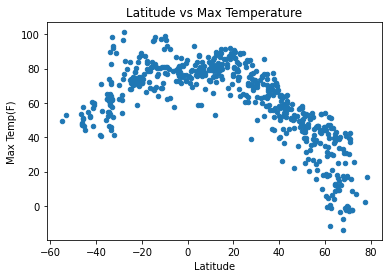

In [16]:
#scatterplot of Latitude vs. temperature
weather_df.plot('Latitude','Max Temp', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")

plt.savefig('Lat vs Max temp Scatterplot.png')
plt.show()

## Latitude vs. Humidity Plot

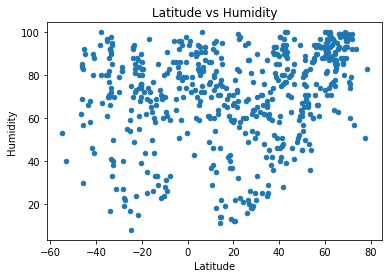

In [17]:
#Scatter Plot of Latitude vs humidity
weather_df.plot('Latitude','Humidity', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.savefig('Lat vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

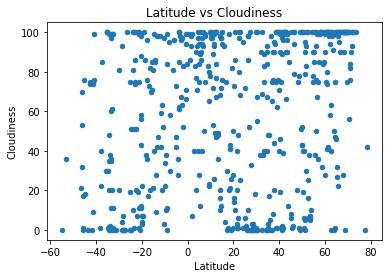

In [18]:
#Scatter plot of Latitude vs cloudiness
weather_df.plot('Latitude','Cloudiness', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.savefig('Lat vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

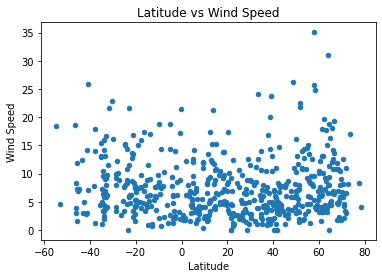

In [19]:
#Scatterplot of Latitude vs Wind Speed
weather_df.plot('Latitude','Wind Speed', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

plt.savefig('Lat vs Wind Speed.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
#dataframe for Northern Hemisphere
weatherNorth_df=weather_df.loc[weather_df['Latitude']>=0]
weatherNorth_df

City  Latitude  Longitude  Humidity  Max Temp  Cloudiness  \
0     saint george   37.1041  -113.5841      36.0     77.47           8   
3         dedougou   12.4667    -3.4667      35.0     89.83          77   
4       butaritari    3.0707   172.7902      73.0     81.88          83   
6           ossora   59.2353   163.0719      93.0     17.94          84   
8        grindavik   63.8424   -22.4338      87.0     39.67           0   
..             ...       ...        ...       ...       ...         ...   
547     warrington   53.3925    -2.5802      83.0     50.49           7   
548      churapcha   62.0025   132.4325     100.0    -11.83          94   
549          sogne   58.0833     7.8167      93.0     53.69         100   
550  cockburn town   21.4612   -71.1419      65.0     84.16          40   
551          vagur   61.4732    -6.8119      91.0     47.05         100   

     Wind Speed          Date  
0          3.11  1.635618e+09  
3          5.17  1.635618e+09  
4          6.04  1.635618e+09  
6          4.45  1.635618e+09  
8          8.05  1.635618e+09  
..          ...           ...  
547        1.99  1.635618e+09  
548        3.20  1.635618e+09  
549       25.75  1.635618e+09  
550        9.22  1.635618e+09  
551       17.90  1.635618e+09  

[378 rows x 8 columns]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#Dataframe for Southern Hempisphere
weatherSouth_df=weather_df.loc[weather_df['Latitude']<0]
weatherSouth_df

City  Latitude  Longitude  Humidity  Max Temp  Cloudiness  \
1            mataura  -46.1927   168.8643      69.0     47.46          32   
2       port lincoln  -34.7333   135.8667      70.0     52.27           1   
5            rikitea  -23.1203  -134.9692      85.0     74.77          86   
7             avarua  -21.2078  -159.7750      61.0     73.45         100   
9             castro  -24.7911   -50.0119      75.0     71.35          51   
..               ...       ...        ...       ...       ...         ...   
518     quirinopolis  -18.4483   -50.4517      44.0     87.46          86   
523  plettenberg bay  -34.0527    23.3716      92.0     59.38           1   
531           cairns  -16.9167   145.7667      97.0     72.07          73   
535            pisco  -13.7000   -76.2167      66.0     69.51          28   
541            rundu  -17.9333    19.7667      35.0     83.26          96   

     Wind Speed          Date  
1          3.85  1.635618e+09  
2          7.18  1.635618e+09  
5         21.70  1.635618e+09  
7         16.87  1.635618e+09  
9          7.90  1.635618e+09  
..          ...           ...  
518        7.52  1.635618e+09  
523        2.44  1.635618e+09  
531        4.83  1.635618e+09  
535        8.99  1.635618e+09  
541        3.87  1.635618e+09  

[174 rows x 8 columns]

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y =0.35x + 58.51


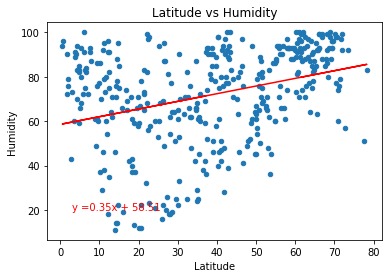

In [22]:
# Linear Regression for Northern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorth_df["Latitude"],weatherNorth_df["Humidity"])
regressionValues= (weatherNorth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorth_df.plot('Latitude','Humidity', kind='scatter', marker="o",)
plt.plot(weatherNorth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")


plt.savefig('Latitude vs Humidity North.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y =-0.01x + 67.11


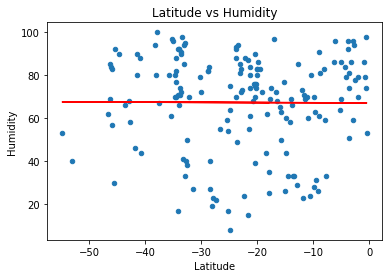

In [23]:
#Southern Hem Humidity vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouth_df["Latitude"],weatherSouth_df["Humidity"])
regressionValues= (weatherSouth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouth_df.plot('Latitude','Humidity', kind='scatter', marker="o",)
plt.plot(weatherSouth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")


plt.savefig('Latitude vs Humidity South.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y =0.27x + 53.05


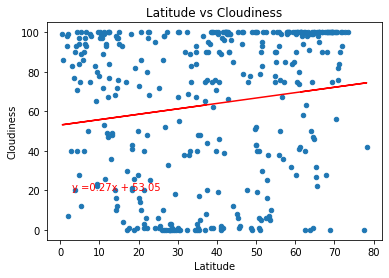

In [24]:
# Linear Regression for Northern Hem Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorth_df["Latitude"],weatherNorth_df["Cloudiness"])
regressionValues= (weatherNorth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorth_df.plot('Latitude','Cloudiness', kind='scatter', marker="o",)
plt.plot(weatherNorth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")


plt.savefig('Latitude vs Cloudiness North.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y =0.86x + 68.42


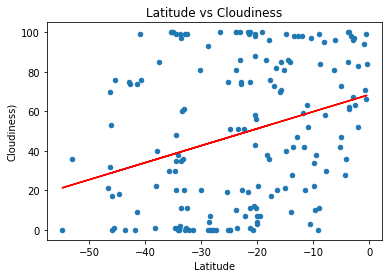

In [25]:
# Linear Regression for Southern Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouth_df["Latitude"],weatherSouth_df["Cloudiness"])
regressionValues= (weatherSouth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouth_df.plot('Latitude','Cloudiness', kind='scatter', marker="o",)
plt.plot(weatherSouth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.title("Latitude vs Cloudiness")


plt.savefig('Latitude vs Cloudiness South.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y =0.04x + 5.44


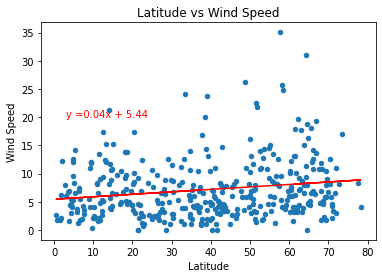

In [26]:
# Linear Regression for Northern Hem Wind speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorth_df["Latitude"],weatherNorth_df["Wind Speed"])
regressionValues= (weatherNorth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorth_df.plot('Latitude','Wind Speed', kind='scatter', marker="o",)
plt.plot(weatherNorth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")


plt.savefig('Latitude vs Wind Speed North.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y =-0.05x + 6.96


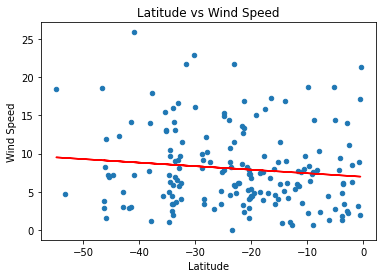

In [27]:
# Linear Regression for Southern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouth_df["Latitude"],weatherSouth_df["Wind Speed"])
regressionValues= (weatherSouth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouth_df.plot('Latitude','Wind Speed', kind='scatter', marker="o",)
plt.plot(weatherSouth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")


plt.savefig('Latitude vs Wind Speed South.png')
plt.show()

y =-1.01x + 94.52


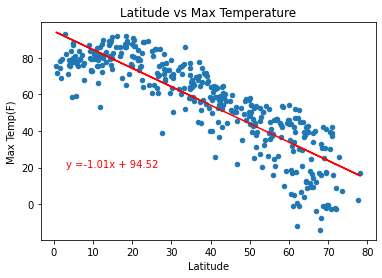

In [28]:
# Linear Regression for Northern Hem Temp vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorth_df["Latitude"],weatherNorth_df["Max Temp"])
regressionValues= (weatherNorth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorth_df.plot('Latitude','Max Temp', kind='scatter', marker="o",)
plt.plot(weatherNorth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")


plt.savefig('Latitude vs Max temp North.png')
plt.show()

y =0.65x + 86.19


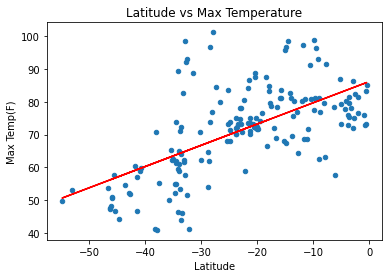

In [29]:
# Linear Regression for Southern Hem MAx Temp vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouth_df["Latitude"],weatherSouth_df["Max Temp"])
regressionValues= (weatherSouth_df["Latitude"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouth_df.plot('Latitude','Max Temp', kind='scatter', marker="o",)
plt.plot(weatherSouth_df["Latitude"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")


plt.savefig('Latitude vs Max temp South.png')
plt.show()